In [1]:
import  pandas as pd
import numpy as np
import tensorflow as tf

In [7]:
# checking Versions 
print("Tensorflow version: ",tf.__version__)
print("Keras Version",tf.keras.__version__)

Tensorflow version:  2.12.0
Keras Version 2.12.0


In [8]:
# Check for null values, identify categorical variables, and encode them.
data = pd.read_csv("/kaggle/input/wine-quality-binary-classification/wine.csv")

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [15]:
data.isna().sum() #data.isnull().sum() returns the same 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
data['quality'].unique() #encode them good:1 and bad:0

array(['bad', 'good'], dtype=object)

In [22]:
def OHE(data):
    if data == 'bad':
        return 0
    else:
        return 1
    

data['quality']=data['quality'].apply(OHE)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
# Q4. Separate the features and target variables from the dataframe.
X = data.iloc[:,:-1] 
y = data.iloc[:,-1:]

In [35]:
# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.35,random_state=36)
    
X_test, X_val, y_test, y_val = train_test_split(X_temp,y_temp, test_size=0.1 , random_state=22)


In [36]:
# Q6. Perform scaling on the dataset.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) # here we use the fit_transform to fit(means stores the mean and std) and transform the data
X_test= scaler.transform(X_test) # We use the training parameters for sclaling the data which ensures the best accurncy 
X_val= scaler.transform(X_val)



In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have your training data (X_train) and corresponding labels (y_train) ready

# Initialize the neural network model
model = Sequential()

# Add the first hidden layer with ReLU activation function
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with ReLU activation function
model.add(Dense(units=64, activation='relu'))

# Add the output layer with sigmoid activation function for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to view the architecture and number of parameters
model.summary()

# Train the model using your training data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1536      
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


NameError: name 'X_validation' is not defined

TensorBoard is a web-based visualization tool provided by TensorFlow, a popular deep learning framework developed by Google. It is designed to help users understand, debug, and optimize the machine learning models they are building. TensorBoard allows you to visualize various aspects of the training and evaluation process, helping you make informed decisions about model architecture, hyperparameters, and data preprocessing.

Here are the key features and aspects of TensorBoard:

### 1. **Scalars:**
   - **Examples:** Training loss, accuracy, validation metrics.
   - **Visualization:** Line charts showing how these metrics change over time (epochs or iterations). Helps you understand how well your model is learning.

### 2. **Graphs:**
   - **Examples:** Computational graph of the neural network model.
   - **Visualization:** Graph representation of the model architecture, showing layers, operations, and connections. Helps you visualize the structure of your neural network.

### 3. **Distributions:**
   - **Examples:** Weights and biases of the model's layers.
   - **Visualization:** Histograms showing the distribution of weights and biases over time. Helps you monitor the stability and convergence of your model during training.

### 4. **Histograms:**
   - **Examples:** Distribution of weights and biases in each layer.
   - **Visualization:** Histograms displaying the distribution of values in tensors. Helps you analyze the spread of values and detect issues like vanishing or exploding gradients.

### 5. **Images:**
   - **Examples:** Input images, filters in convolutional layers.
   - **Visualization:** Allows you to view images directly. Useful for understanding how your model sees the data or how the filters in convolutional layers evolve during training.

### 6. **Projector:**
   - **Examples:** High-dimensional embeddings (e.g., word embeddings).
   - **Visualization:** Interactive 3D visualization of high-dimensional data points. Helps you understand the relationships between data points in a visually intuitive way.

### 7. **Text:**
   - **Examples:** Text summaries or embeddings.
   - **Visualization:** Textual data, such as text summaries or embeddings. Allows you to visualize text-based information directly in TensorBoard.

### 8. **Profile Plugin:**
   - **Examples:** Detailed information about the time taken by each operation during training.
   - **Visualization:** Profiling information to identify performance bottlenecks in your model. Helps you optimize the training process for faster convergence.

### How to Use TensorBoard:

1. **Logging Data:**
   - During training, you log the desired data (e.g., loss, accuracy, histograms) using TensorFlow's `tf.summary` API. TensorBoard callbacks can also be added to Keras models to log data automatically.

2. **Running TensorBoard:**
   - After training, you run TensorBoard from the command line, specifying the log directory where your data is stored.
   ```
   tensorboard --logdir=/path/to/log/directory
   ```

3. **Accessing TensorBoard:**
   - Open a web browser and navigate to the local URL provided by TensorBoard (usually http://localhost:6006/). Here, you can interact with the various visualizations to gain insights into your model's behavior and performance.

TensorBoard is a powerful tool for deep learning practitioners, enabling them to explore and understand their models in a more intuitive and insightful way. By leveraging TensorBoard, you can make data-driven decisions to improve the accuracy and efficiency of your machine learning models.

In [61]:
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

# Define the TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)
# Train the model with the TensorBoard callback
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/20
33/33 [==============================] - 0s 6ms/step - loss: 0.1497 - accuracy: 0.9548 - val_loss: 0.8567 - val_accuracy: 0.7321
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1575 - accuracy: 0.9471 - val_loss: 0.7952 - val_accuracy: 0.6964
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9528 - val_loss: 0.8844 - val_accuracy: 0.6964
Epoch 4/20
33/33 [==============================] - 0s 5ms/step - loss: 0.1444 - accuracy: 0.9509 - val_loss: 0.8122 - val_accuracy: 0.7143
Epoch 5/20
33/33 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.9596 - val_loss: 0.7417 - val_accuracy: 0.7143
Epoch 6/20
33/33 [==============================] - 0s 5ms/step - loss: 0.1485 - accuracy: 0.9548 - val_loss: 1.0862 - val_accuracy: 0.7143
Epoch 7/20
33/33 [==============================] - 0s 5ms/step - loss: 0.1360 - accuracy: 0.9634 - val_loss: 0.7337 - val_accuracy: 0.7321
Epoch 8/20
33/33 [==

In [62]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])


# EarlyStopping is used as a callback during the model's training process.
# monitor='val_loss' specifies that the validation loss will be monitored to decide whether to stop training.
# patience=10 indicates that training will stop after 10 epochs of no improvement in the validation loss.
# restore_best_weights=True ensures that the model's weights are restored to the best performing epoch when training stops.

Epoch 1/100
33/33 [==============================] - 0s 4ms/step - loss: 0.1198 - accuracy: 0.9673 - val_loss: 0.9621 - val_accuracy: 0.7500
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9625 - val_loss: 0.8585 - val_accuracy: 0.7321
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.9673 - val_loss: 0.9602 - val_accuracy: 0.7679
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1079 - accuracy: 0.9721 - val_loss: 0.9966 - val_accuracy: 0.7500
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9721 - val_loss: 0.8530 - val_accuracy: 0.7679
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.9692 - val_loss: 0.8107 - val_accuracy: 0.7857
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9673 - val_loss: 1.0733 - val_accuracy: 0.7321
Epoch 8/100
3

In [63]:
# Define ModelCheckpoint callback to save the best model based on validation loss
checkpoint = ModelCheckpoint(filepath='best_model.h5',  # Filepath to save the best model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (overwrite if there's an improvement)
                             save_weights_only=False,  # Save entire model including weights, not just the weights
                             mode='min',  # 'min' means save the model when the monitored metric decreases
                             verbose=1)  # Show a message when the best model is saved



# Train the model with ModelCheckpoint callback
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/100
21/33 [==================>...........] - ETA: 0s - loss: 0.0949 - accuracy: 0.9807
Epoch 1: val_loss improved from inf to 1.04593, saving model to best_model.h5
33/33 [==============================] - 0s 6ms/step - loss: 0.0950 - accuracy: 0.9759 - val_loss: 1.0459 - val_accuracy: 0.7321
Epoch 2/100
32/33 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9727
Epoch 2: val_loss improved from 1.04593 to 0.94653, saving model to best_model.h5
33/33 [==============================] - 0s 3ms/step - loss: 0.1039 - accuracy: 0.9731 - val_loss: 0.9465 - val_accuracy: 0.6964
Epoch 3/100
 1/33 [..............................] - ETA: 0s - loss: 0.1324 - accuracy: 0.9375
Epoch 3: val_loss did not improve from 0.94653
33/33 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9711 - val_loss: 0.9798 - val_accuracy: 0.7500
Epoch 4/100
 1/33 [..............................] - ETA: 0s - loss: 0.0735 - accuracy: 0.9688
Epoch 4: val_loss did not 

In [64]:
# saving the histroy to dataframe
import pandas as pd

# Assuming 'history' contains the training history returned by the model.fit() function

# Convert the training history to a Pandas DataFrame
history_df = pd.DataFrame(history.history)


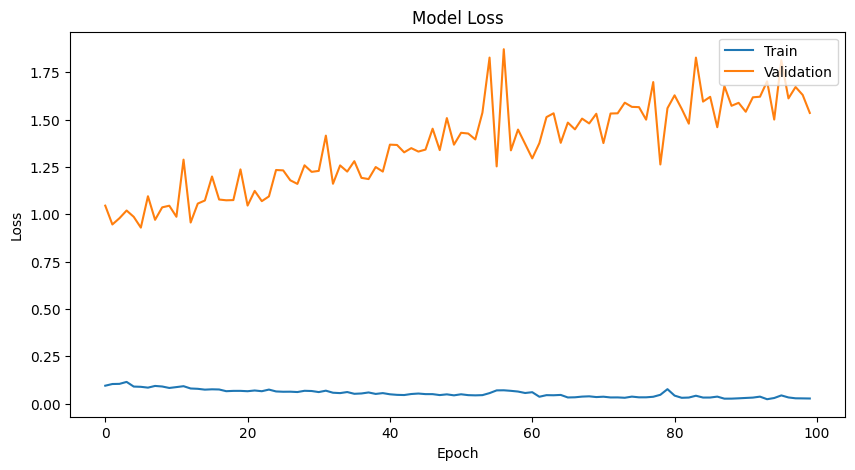

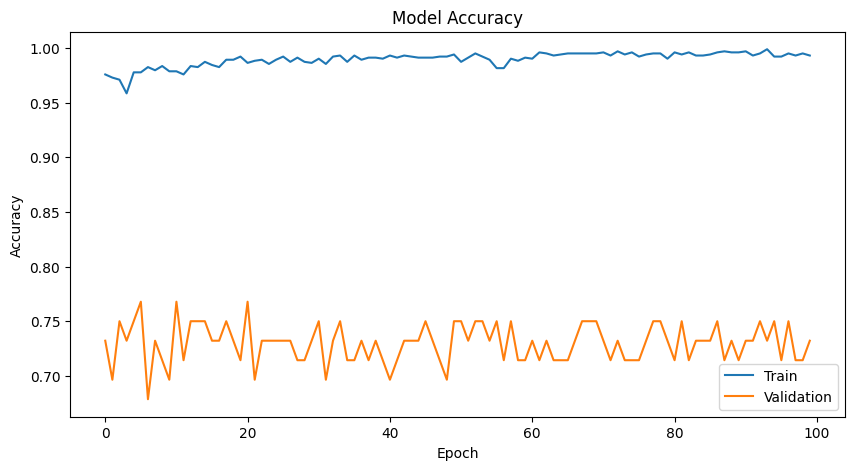

In [66]:

# Plot the model's training history:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [68]:
# Assuming 'model' is the trained model and 'X_test', 'y_test' are your test data

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)

# Print the test loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

16/16 [==============================] - 0s 2ms/step - loss: 1.2856 - accuracy: 0.7579
Test Loss: 1.2856
Test Accuracy: 0.7579
